In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

import preprocessing
import utils
import implementations
import helpers
%load_ext autoreload
%autoreload 2

In [2]:
y, X, _ = helpers.load_csv_data(path="resources/train.csv")

print("Input data shape", X.shape)
print("Labels data shape", y.shape)

Input data shape (250000, 30)
Labels data shape (250000,)


In [3]:
y

array([ 1., -1., -1., ...,  1., -1., -1.])

In [4]:
x_tr, x_val, y_tr, y_val = utils.split_data(X, y, 0.8)
degrees = [15, 16, 15]
lambdas = [0.0001, 0.0001, 0.0005]

In [5]:
train_acc, val_acc = [], []
n = y_tr.shape[0]
lambda_ = 0

cnt = 0
for k in range(50, 200000, 500):
    x_tr_tmp = x_tr[:k]
    y_tr_tmp = y_tr[:k]
    
    training_groups = utils.group_by_categories(x_tr_tmp, column=22)
    validation_groups = utils.group_by_categories(x_val, column=22)
    
    total_correct_tr = 0
    total_correct_test = 0
    for i, (training_group_idx, validation_group_idx, degree, lambda_) in enumerate(
        zip(training_groups, validation_groups, degrees, lambdas)
    ):
        x_tr_i, y_tr_i = x_tr_tmp[training_group_idx], y_tr_tmp[training_group_idx]
        x_val_i, y_val_i = x_val[validation_group_idx], y_val[validation_group_idx]

        x_tr_i, x_val_i, y_tr_i, y_val_i = preprocessing.preprocess_data(
            x_tr_i, x_val_i, y_tr_i, y_val_i, degree=degree
        )

        weights, _ = implementations.ridge_regression(y_tr_i, x_tr_i, lambda_)

        y_pred = np.array([-1 if x @ weights < 0 else 1 for x in x_tr_i])
        correct_predict = (y_pred == y_tr_i).sum()
        total_correct_tr += correct_predict
        
        y_pred = np.array([-1 if x @ weights < 0 else 1 for x in x_val_i])
        correct_predict = (y_pred == y_val_i).sum()
        total_correct_test += correct_predict
        
        
    train_acc.append(total_correct_tr / len(y_tr_tmp))
    val_acc.append(total_correct_test / len(y_val))
    
    if (cnt % 20 == 0):
        print(k, train_acc[-1], val_acc[-1])
    
    cnt += 1 

50 1.0 0.50656
10050 0.8773134328358209 0.80402
20050 0.857356608478803 0.8245
30050 0.8543760399334442 0.83182
40050 0.8510112359550562 0.83372
50050 0.8498901098901099 0.8345
60050 0.8486594504579517 0.83698
70050 0.847094932191292 0.8367
80050 0.846470955652717 0.83692
90050 0.8452415324819544 0.83632
100050 0.8447376311844078 0.8368
110050 0.8029713766469786 0.79718
120050 0.8436484798000833 0.83744
130050 0.8432141484044599 0.83772
140050 0.8426561942163513 0.83872
150050 0.8421792735754748 0.83886
160050 0.7637550765385817 0.76212
170050 0.8416936195236695 0.83876
180050 0.8416662038322689 0.83884
190050 0.8415469613259668 0.83934


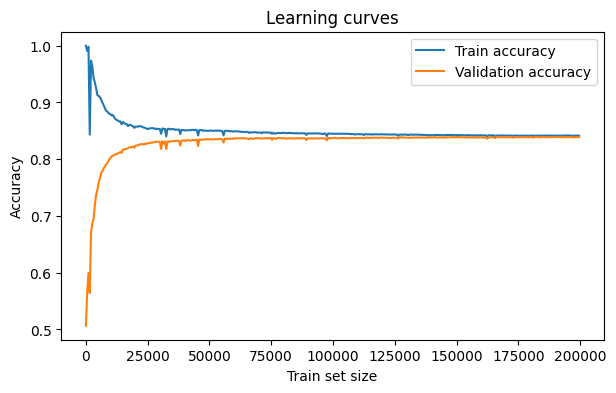

In [46]:
fig = plt.figure(figsize = (7,4))
plt.plot(x, train_acc, label= 'Train accuracy')
plt.plot(x, val_acc, label= 'Validation accuracy')
plt.xlabel('Train set size')
plt.ylabel('Accuracy')
plt.legend(loc="upper right")
plt.title('Learning curves')
plt.savefig("learning curves")
plt.show()

In [7]:
y, X, _ = helpers.load_csv_data(path="resources/train.csv")

print("Input data shape", X.shape)
print("Labels data shape", y.shape)

Input data shape (250000, 30)
Labels data shape (250000,)


In [8]:
y[np.where(y == -1)] = 0
y

array([1., 0., 0., ..., 1., 0., 0.])

In [9]:
x_tr, x_val, y_tr, y_val = utils.split_data(X, y, 0.8)
degrees = [3, 3, 3]
lambdas = [0.0001, 0.0001, 0.0005]

In [19]:
train_acc1, val_acc1 = [], []
n = y_tr.shape[0]
lambda_ = 0

cnt = 0
for k in range(50, 200000, 1000):
    x_tr_tmp = x_tr[:k]
    y_tr_tmp = y_tr[:k]
    
    training_groups = utils.group_by_categories(x_tr_tmp, column=22)
    validation_groups = utils.group_by_categories(x_val, column=22)
    
    total_correct_tr = 0
    total_correct_test = 0
    for i, (training_group_idx, validation_group_idx, degree, lambda_) in enumerate(
        zip(training_groups, validation_groups, degrees, lambdas)
    ):
        x_tr_i, y_tr_i = x_tr_tmp[training_group_idx], y_tr_tmp[training_group_idx]
        x_val_i, y_val_i = x_val[validation_group_idx], y_val[validation_group_idx]

        x_tr_i, x_val_i, y_tr_i, y_val_i = preprocessing.preprocess_data(
            x_tr_i, x_val_i, y_tr_i, y_val_i, degree=degree
        )

        weights, _ = implementations.reg_logistic_regression(
            y_tr_i, x_tr_i, 0.01, np.zeros(x_tr_i.shape[1]), max_iters=100, gamma="adaptive", verbose=False)

        y_pred = np.array([utils.logistic(x, weights) for x in x_tr_i])
        correct_predict = (y_pred == y_tr_i).sum()
        total_correct_tr += correct_predict
        
        y_pred = np.array([utils.logistic(x, weights) for x in x_val_i])
        correct_predict = (y_pred == y_val_i).sum()
        total_correct_test += correct_predict
        
        
    train_acc1.append(total_correct_tr / len(y_tr_tmp))
    val_acc1.append(total_correct_test / len(y_val))
    
    if (cnt % 20 == 0):
        print(k, train_acc1[-1], val_acc1[-1])
    
    cnt += 1 

50 1.0 0.6349
20050 0.769576059850374 0.7612
40050 0.7690387016229713 0.76214
60050 0.7680766028309742 0.763
80050 0.7668332292317301 0.76306
100050 0.767056471764118 0.76376
120050 0.7674302374010828 0.76362


KeyboardInterrupt: 